## 라이브러리 불러오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
pd.set_option('display.max_columns', None)

## 분석 및 전처리

### 데이터 불러오기

#### 공기 데이터

In [3]:
# 데이터 불러오기
law_air_21 = pd.read_csv("air_2021.csv", sep=",", index_col=0, encoding="utf-8")
law_air_22 = pd.read_csv("air_2022.csv", sep=",", index_col=0, encoding="utf-8")

In [4]:
law_air_21.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2021100102,0.003,0.6,0.002,0.035,27.0,16.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2021100103,0.003,0.6,0.002,0.033,28.0,18.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2021100104,0.003,0.6,0.002,0.030,26.0,16.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2021100105,0.003,0.5,0.003,0.026,26.0,16.0,서울 종로구 종로35가길 19


In [5]:
law_air_22.tail()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
2155,서울 종로구,도시대기,111123,종로구,2022033120,0.002,0.4,0.036,0.017,11.0,8.0,서울 종로구 종로35가길 19
2156,서울 종로구,도시대기,111123,종로구,2022033121,0.002,0.4,0.032,0.018,10.0,7.0,서울 종로구 종로35가길 19
2157,서울 종로구,도시대기,111123,종로구,2022033122,0.003,0.3,0.038,0.013,11.0,5.0,서울 종로구 종로35가길 19
2158,서울 종로구,도시대기,111123,종로구,2022033123,0.003,0.3,0.036,0.015,11.0,5.0,서울 종로구 종로35가길 19
2159,서울 종로구,도시대기,111123,종로구,2022033124,0.002,0.4,0.033,0.017,9.0,5.0,서울 종로구 종로35가길 19


지역, 망, 측정소코드, 측정소명, 주소 값의 경우 모두 동일하기 때문에 제거

In [6]:
air_21 = law_air_21.drop(columns=["지역", "망", "측정소코드", "측정소명", "주소"])
air_22 = law_air_22.drop(columns=["지역", "망", "측정소코드", "측정소명", "주소"])

In [7]:
air_21.head()

,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,2021100101,0.003,0.6,0.002,0.039,31.0,18.0
1,2021100102,0.003,0.6,0.002,0.035,27.0,16.0
2,2021100103,0.003,0.6,0.002,0.033,28.0,18.0
3,2021100104,0.003,0.6,0.002,0.030,26.0,16.0
4,2021100105,0.003,0.5,0.003,0.026,26.0,16.0


#### 날씨 데이터

In [8]:
law_weather_21 = pd.read_csv("weather_2021.csv", sep=",", encoding="cp949")
law_weather_22 = pd.read_csv("weather_2022.csv", sep=",", encoding="cp949")

In [9]:
law_weather_21.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,NaN,68,NaN,2.2,-13.5,1016.4,NaN,1027.7,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6
1,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,NaN,69,NaN,2.1,-13.7,1016.2,NaN,1027.5,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6
2,108,서울,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,NaN,70,NaN,2.1,-13.7,1016.8,NaN,1028.1,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6
3,108,서울,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,NaN,71,NaN,2.2,-13.5,1016.2,NaN,1027.5,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5
4,108,서울,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,NaN,72,NaN,2.1,-13.8,1015.6,NaN,1026.9,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5


In [10]:
law_weather_22.tail()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
2155,108,서울,2022-03-31 19:00,12.3,NaN,NaN,NaN,2.9,NaN,340,NaN,47,NaN,6.7,1.2,1013.4,NaN,1023.8,NaN,0.4,NaN,0.2,NaN,NaN,NaN,6,1,NaN,9.0,2000,NaN,NaN,10.0,NaN,12.6,11.8,11.0,10.2
2156,108,서울,2022-03-31 20:00,11.6,NaN,NaN,NaN,2.7,NaN,340,NaN,48,NaN,6.5,0.9,1014.6,NaN,1025.0,NaN,NaN,9.0,NaN,9.0,NaN,NaN,6,0,NaN,NaN,2000,NaN,NaN,8.9,NaN,12.2,11.6,11.0,10.3
2157,108,서울,2022-03-31 21:00,10.5,NaN,NaN,NaN,3.5,NaN,320,NaN,51,NaN,6.4,0.7,1015.4,NaN,1025.9,NaN,NaN,9.0,NaN,9.0,NaN,NaN,1,1,Sc,10.0,2000,NaN,NaN,7.8,NaN,11.8,11.4,11.0,10.4
2158,108,서울,2022-03-31 22:00,9.3,NaN,NaN,NaN,1.9,NaN,50,NaN,58,NaN,6.8,1.4,1016.4,NaN,1026.9,NaN,NaN,9.0,NaN,9.0,NaN,NaN,3,3,NaN,10.0,2000,NaN,NaN,7.3,NaN,11.4,11.1,10.9,10.5
2159,108,서울,2022-03-31 23:00,8.4,NaN,NaN,NaN,1.2,NaN,360,NaN,61,NaN,6.7,1.3,1016.9,NaN,1027.4,NaN,NaN,9.0,NaN,9.0,NaN,NaN,1,1,NaN,10.0,2000,NaN,NaN,6.7,NaN,11.0,10.8,10.8,10.5


공기데이터와 마찬가지로 지점, 지점명은 같은 값이기에 제거

In [11]:
weather_21 = law_weather_21.drop(columns=["지점", "지점명"])
weather_22 = law_weather_22.drop(columns=["지점", "지점명"])

In [12]:
weather_21.head()

,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),습도 QC플래그,증기압(hPa),이슬점온도(°C),현지기압(hPa),현지기압 QC플래그,해면기압(hPa),해면기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,NaN,68,NaN,2.2,-13.5,1016.4,NaN,1027.7,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6
1,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,NaN,69,NaN,2.1,-13.7,1016.2,NaN,1027.5,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6
2,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,NaN,70,NaN,2.1,-13.7,1016.8,NaN,1028.1,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6
3,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,NaN,71,NaN,2.2,-13.5,1016.2,NaN,1027.5,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5
4,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,NaN,72,NaN,2.1,-13.8,1015.6,NaN,1026.9,NaN,NaN,9.0,NaN,9.0,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5


### 데이터 확인

#### 공기 데이터

In [13]:
air_21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 0 to 8759
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   측정일시    8760 non-null   int64  
 1   SO2     8648 non-null   float64
 2   CO      8680 non-null   float64
 3   O3      8663 non-null   float64
 4   NO2     8680 non-null   float64
 5   PM10    8655 non-null   float64
 6   PM25    8663 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 547.5 KB


In [14]:
air_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, 0 to 2159
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   측정일시    2160 non-null   int64  
 1   SO2     2139 non-null   float64
 2   CO      2139 non-null   float64
 3   O3      2139 non-null   float64
 4   NO2     2139 non-null   float64
 5   PM10    2122 non-null   float64
 6   PM25    2135 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 135.0 KB


공기 데이터의 경우 대체로 결측치가 없거나 적은 수준이기에 해당 행을 제외하고 데이터프레임 형성

In [15]:
air_21 = air_21.dropna()
air_22 = air_22.dropna()

In [16]:
# 시각화 한글폰트 설정
plt.rc('font', family="NanumGothic")
sns.set(font="NanumGothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style="darkgrid")

<Axes: >

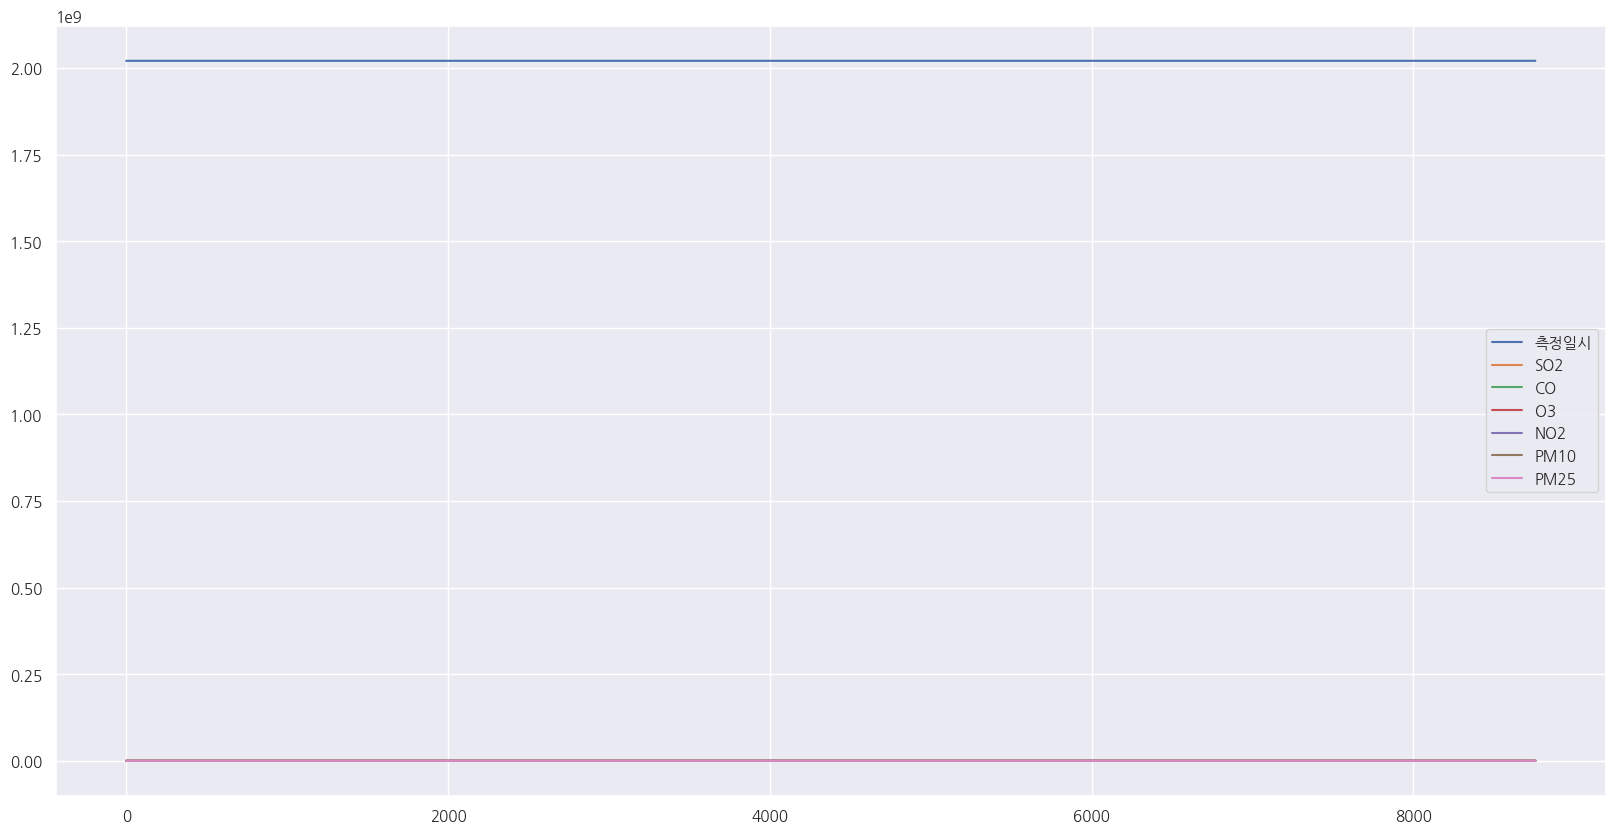

In [17]:
air_21.plot.line(figsize=(20,10))

<Axes: >

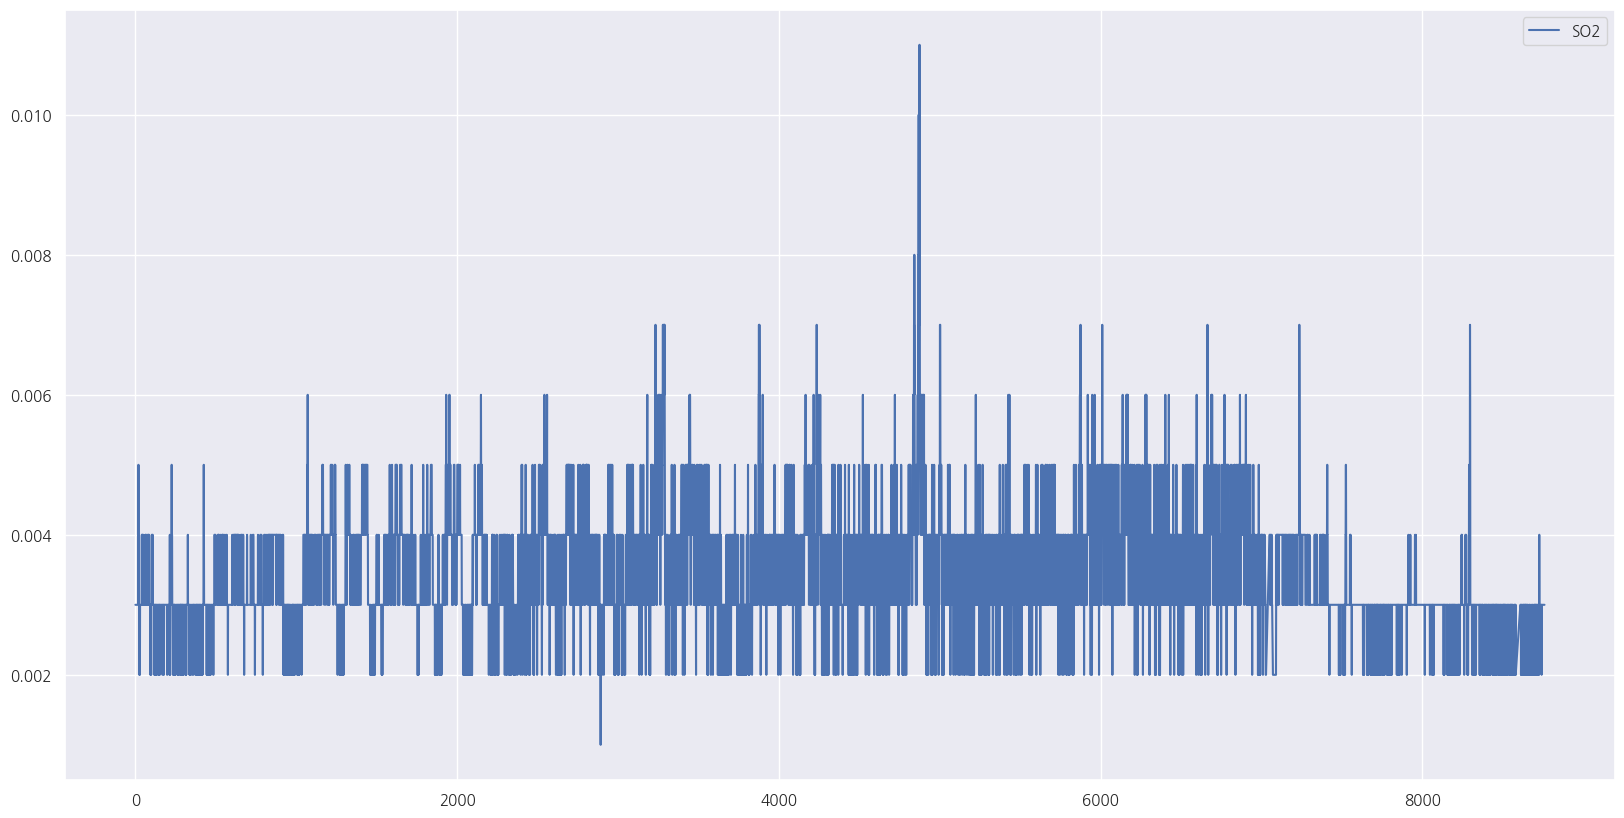

In [18]:
air_21[["SO2"]].plot.line(figsize=(20,10))

<Axes: >

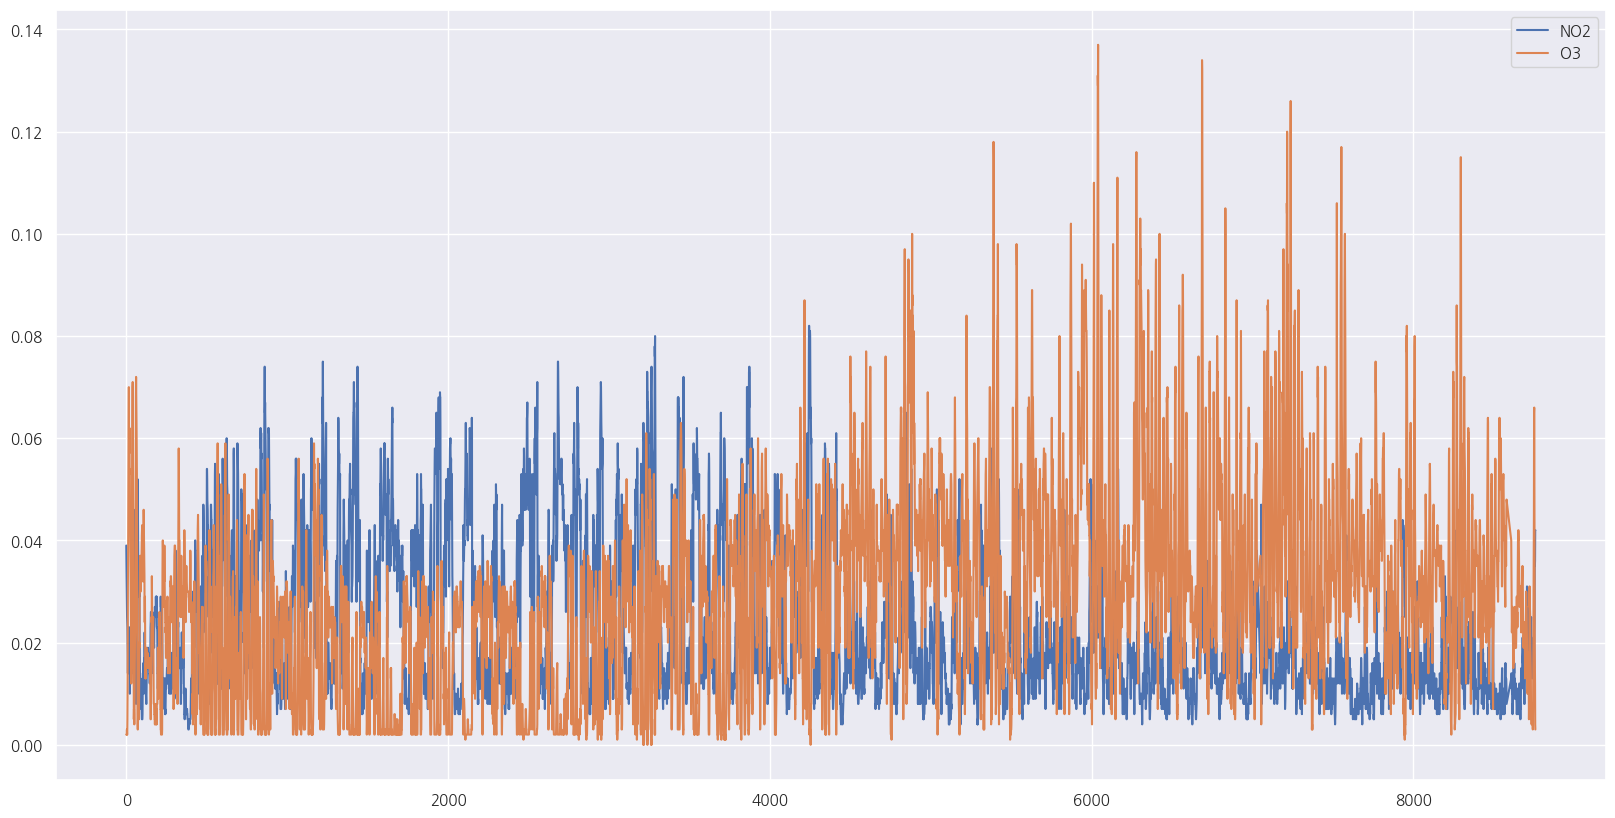

In [19]:
air_21[["NO2","O3"]].plot.line(figsize=(20,10))

<Axes: >

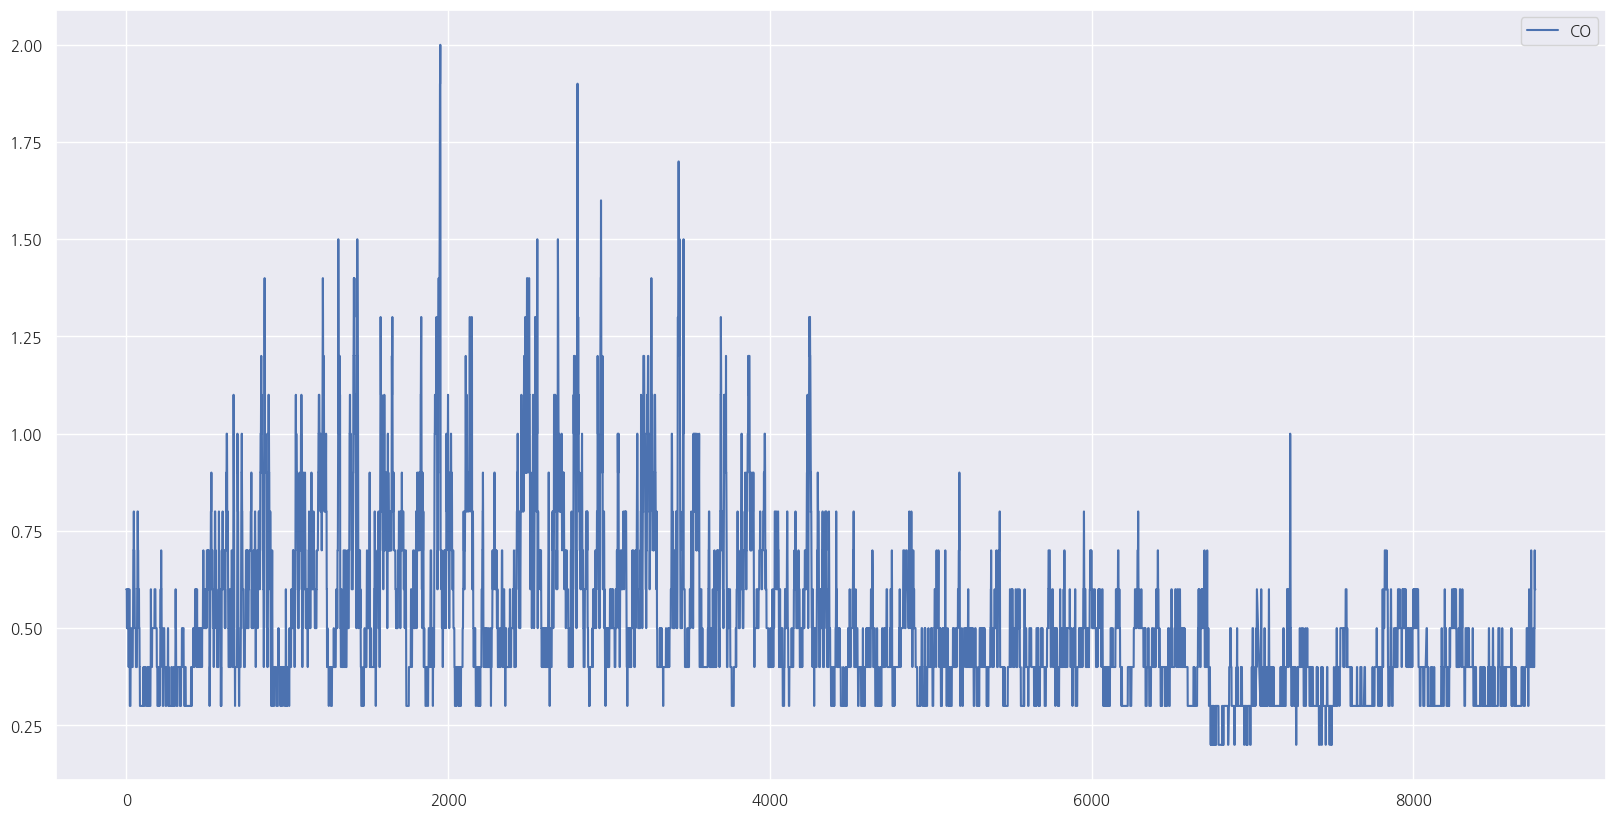

In [20]:
air_21[["CO"]].plot.line(figsize=(20,10))

<Axes: >

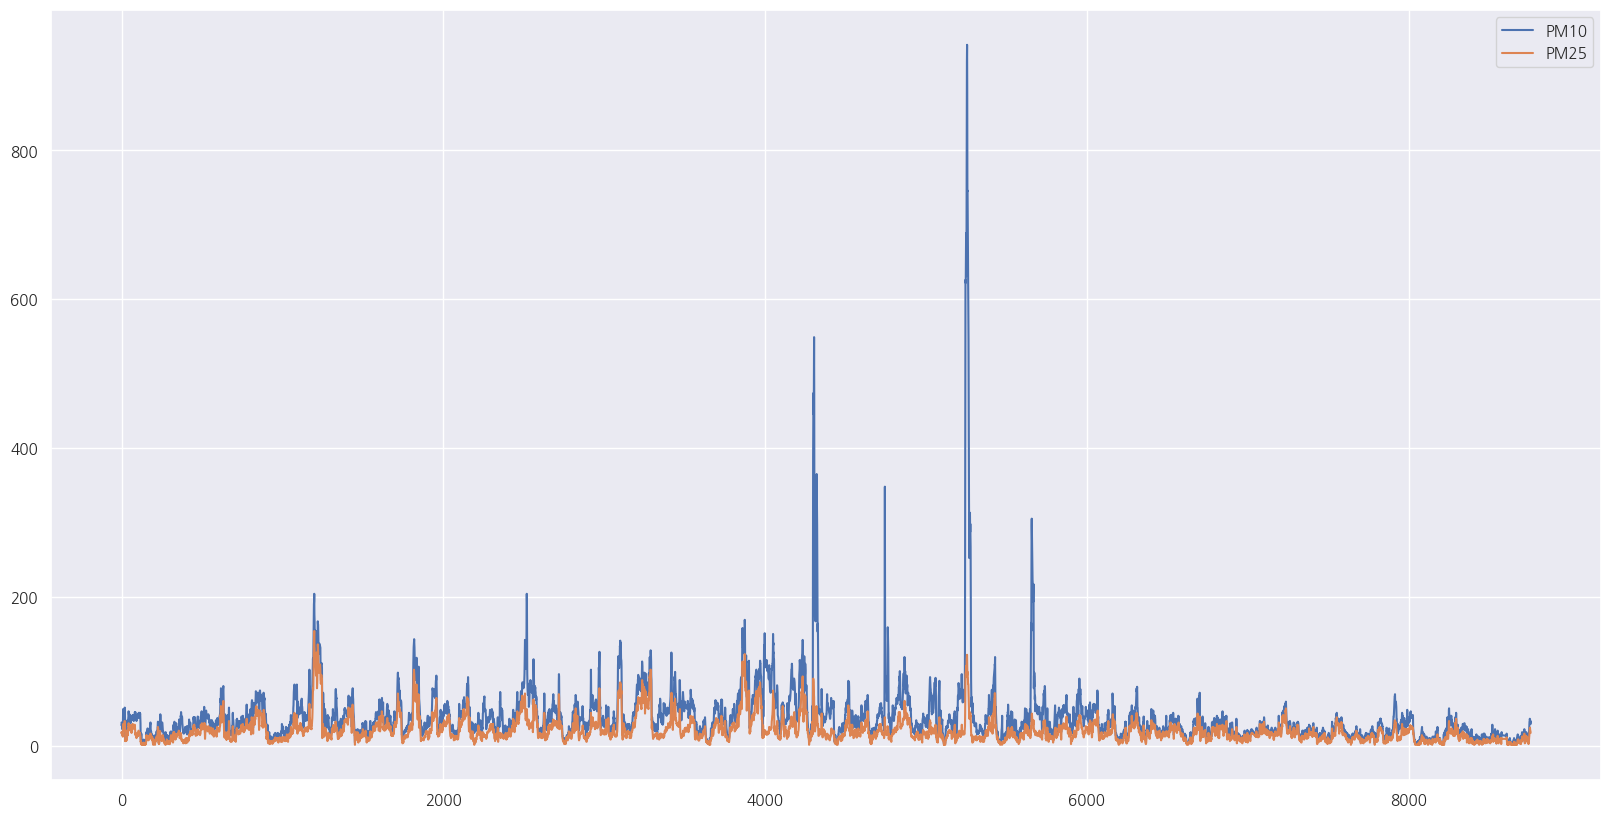

In [21]:
air_21[["PM10", "PM25"]].plot.line(figsize=(20,10))

단위차이로 확인이 쉽지 않지만 서로간 비슷한 흐름을 유지하는 것으로 판단됨

<Axes: >

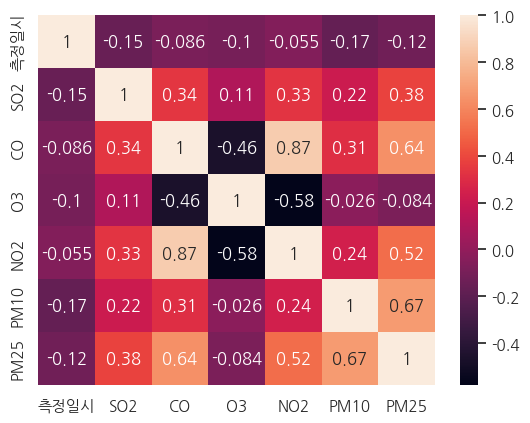

In [22]:
sns.heatmap(air_21.astype(float).corr(), annot=True)

**음의 상관관계**
- 중간 : (CO, O3), (O3, NO2)


**양의 상관관계**
- 매우 강함 : (CO, NO2)
- 강함 : (CO, PM25), (PM10, PM25)
- 중간 : (NO2, PM25)

#### 날씨 데이터

##### 결측치 처리(데이터가 전혀 없는 경우)

In [23]:
law_weather_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8759 non-null   int64  
 1   지점명            8759 non-null   object 
 2   일시             8759 non-null   object 
 3   기온(°C)         8759 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        949 non-null    float64
 6   강수량 QC플래그      1763 non-null   float64
 7   풍속(m/s)        8757 non-null   float64
 8   풍속 QC플래그       2 non-null      float64
 9   풍향(16방위)       8757 non-null   float64
 10  풍향 QC플래그       2 non-null      float64
 11  습도(%)          8759 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       8759 non-null   float64
 14  이슬점온도(°C)      8759 non-null   float64
 15  현지기압(hPa)      8759 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      8759 non-null   float64
 18  해면기압 QC플

In [24]:
law_weather_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             2160 non-null   int64  
 1   지점명            2160 non-null   object 
 2   일시             2160 non-null   object 
 3   기온(°C)         2160 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        81 non-null     float64
 6   강수량 QC플래그      382 non-null    float64
 7   풍속(m/s)        2160 non-null   float64
 8   풍속 QC플래그       0 non-null      float64
 9   풍향(16방위)       2160 non-null   int64  
 10  풍향 QC플래그       0 non-null      float64
 11  습도(%)          2160 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       2160 non-null   float64
 14  이슬점온도(°C)      2160 non-null   float64
 15  현지기압(hPa)      2160 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      2160 non-null   float64
 18  해면기압 QC플

데이터가 전혀 존재하지 않는 컬럼들 및 모든 데이터가 동일한 컬럼들 제거

In [25]:
weather_21 = law_weather_21.drop(columns=["지점", "지점명", "기온 QC플래그", "강수량 QC플래그", "풍속 QC플래그", "풍향 QC플래그", "습도 QC플래그", "현지기압 QC플래그", "해면기압 QC플래그", "지면상태(지면상태코드)", "지면온도 QC플래그"])
weather_22 = law_weather_22.drop(columns=["지점", "지점명", "기온 QC플래그", "강수량 QC플래그", "풍속 QC플래그", "풍향 QC플래그", "습도 QC플래그", "현지기압 QC플래그", "해면기압 QC플래그", "지면상태(지면상태코드)", "지면온도 QC플래그"])

In [26]:
weather_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   일시             8759 non-null   object 
 1   기온(°C)         8759 non-null   float64
 2   강수량(mm)        949 non-null    float64
 3   풍속(m/s)        8757 non-null   float64
 4   풍향(16방위)       8757 non-null   float64
 5   습도(%)          8759 non-null   int64  
 6   증기압(hPa)       8759 non-null   float64
 7   이슬점온도(°C)      8759 non-null   float64
 8   현지기압(hPa)      8759 non-null   float64
 9   해면기압(hPa)      8759 non-null   float64
 10  일조(hr)         4791 non-null   float64
 11  일조 QC플래그       3968 non-null   float64
 12  일사(MJ/m2)      4791 non-null   float64
 13  일사 QC플래그       3968 non-null   float64
 14  적설(cm)         379 non-null    float64
 15  3시간신적설(cm)     29 non-null     float64
 16  전운량(10분위)      8757 non-null   float64
 17  중하층운량(10분위)    8759 non-null   int64  
 18  운형(운형약어)

##### 결측치 처리(강수량, 적설량)

강수량, 적설량 등은 오지 않은 것을 0으로 표시하지 않고 결측치로 뒀을 것이라 추측

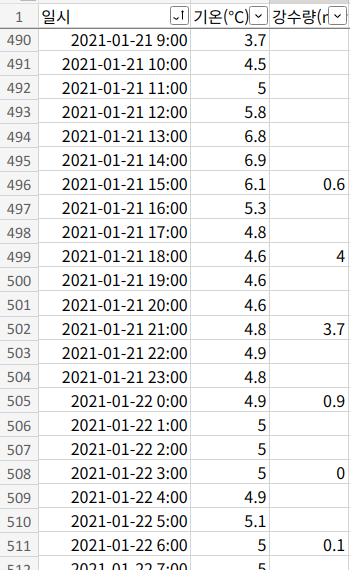

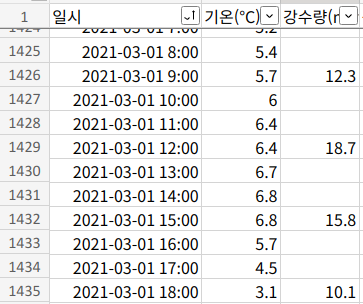

실제 데이터 확인 결과 강수량이 없더라도 0은 존재하고 많은 강수값 사이에도 결측치가 존재하여 다른 대안으로 결측치 뒷 5개의 행에 대한 평균값을 넣는 방법 및 마지막 5개의 행에 대해서는 앞의 값을 넣는 방법을 사용

In [27]:
# 강수량(mm) 
weather_21["강수량(mm)"] = weather_21["강수량(mm)"].fillna(weather_21["강수량(mm)"].rolling(5, min_periods=1).mean().shift(-5))
weather_21["강수량(mm)"].fillna(method='ffill', inplace=True)
weather_22["강수량(mm)"] = weather_22["강수량(mm)"].fillna(weather_22["강수량(mm)"].rolling(5, min_periods=1).mean().shift(-5))
weather_22["강수량(mm)"].fillna(method='ffill', inplace=True)

# 적설(cm)처리
weather_21["적설(cm)"] = weather_21["적설(cm)"].fillna(weather_21["적설(cm)"].rolling(5, min_periods=1).mean().shift(-5))
weather_21["적설(cm)"].fillna(method='ffill', inplace=True)
weather_22["적설(cm)"] = weather_22["적설(cm)"].fillna(weather_22["적설(cm)"].rolling(5, min_periods=1).mean().shift(-5))
weather_22["적설(cm)"].fillna(method='ffill', inplace=True)

# 3시간신적설(cm)
weather_21["3시간신적설(cm)"] = weather_21["3시간신적설(cm)"].fillna(weather_21["3시간신적설(cm)"].rolling(5, min_periods=1).mean().shift(-5))
weather_21["3시간신적설(cm)"].fillna(method='ffill', inplace=True)
weather_22["3시간신적설(cm)"] = weather_22["3시간신적설(cm)"].fillna(weather_22["3시간신적설(cm)"].rolling(5, min_periods=1).mean().shift(-5))
weather_22["3시간신적설(cm)"].fillna(method='ffill', inplace=True)


In [28]:
weather_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   일시             8759 non-null   object 
 1   기온(°C)         8759 non-null   float64
 2   강수량(mm)        8669 non-null   float64
 3   풍속(m/s)        8757 non-null   float64
 4   풍향(16방위)       8757 non-null   float64
 5   습도(%)          8759 non-null   int64  
 6   증기압(hPa)       8759 non-null   float64
 7   이슬점온도(°C)      8759 non-null   float64
 8   현지기압(hPa)      8759 non-null   float64
 9   해면기압(hPa)      8759 non-null   float64
 10  일조(hr)         4791 non-null   float64
 11  일조 QC플래그       3968 non-null   float64
 12  일사(MJ/m2)      4791 non-null   float64
 13  일사 QC플래그       3968 non-null   float64
 14  적설(cm)         8670 non-null   float64
 15  3시간신적설(cm)     8669 non-null   float64
 16  전운량(10분위)      8757 non-null   float64
 17  중하층운량(10분위)    8759 non-null   int64  
 18  운형(운형약어)

In [29]:
weather_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   일시             2160 non-null   object 
 1   기온(°C)         2160 non-null   float64
 2   강수량(mm)        2135 non-null   float64
 3   풍속(m/s)        2160 non-null   float64
 4   풍향(16방위)       2160 non-null   int64  
 5   습도(%)          2160 non-null   int64  
 6   증기압(hPa)       2160 non-null   float64
 7   이슬점온도(°C)      2160 non-null   float64
 8   현지기압(hPa)      2160 non-null   float64
 9   해면기압(hPa)      2160 non-null   float64
 10  일조(hr)         1071 non-null   float64
 11  일조 QC플래그       1089 non-null   float64
 12  일사(MJ/m2)      1071 non-null   float64
 13  일사 QC플래그       1089 non-null   float64
 14  적설(cm)         2135 non-null   float64
 15  3시간신적설(cm)     2135 non-null   float64
 16  전운량(10분위)      2160 non-null   int64  
 17  중하층운량(10분위)    2160 non-null   int64  
 18  운형(운형약어)

21년 데이터 기준, 연속적으로 결측치가 존재하는 구간으로 90개의 강수량, 3시간신적설 데이터와 89개의 적설 데이터의 결측치 존재

22년 기준, 강수량, 적설, 3시간신적설 데이터 모두 25개의 결측치 존재

In [30]:
# 임시로 데이터 저장 후 실제 파일 열람
weather_21.to_csv('temp_weather_21.csv', index=False, encoding='utf-8-sig')
weather_22.to_csv('temp_weather_22.csv', index=False, encoding='utf-8-sig')

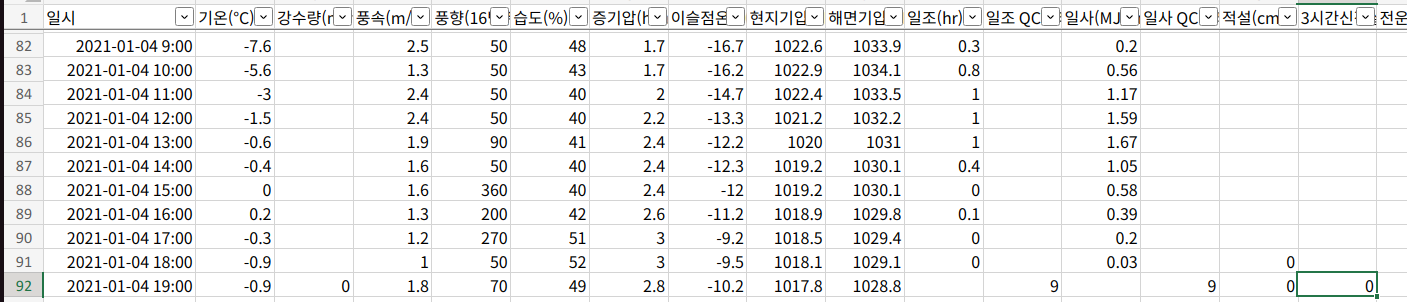

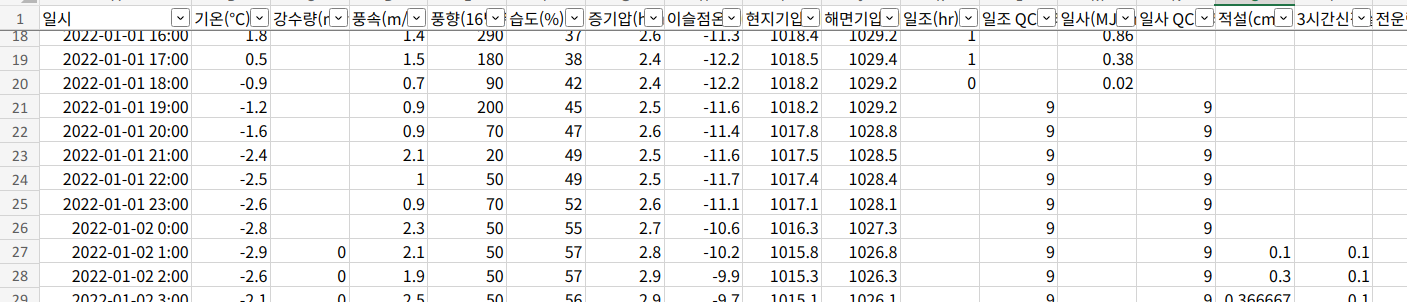

실제 데이터의 경우 21년 1월 4일 19시 이전 데이터, 22년 1월 2일 1시 이전 데이터만 존재하지 않고 해당 기간은 눈이 올 수 있는 기간이기에 단순히 0으로 처리하기에 무리가 있다고 판단

전체 데이터에서 해당 구간이 차지하는 비율은 1% 추가적인 결측치 확인 후 결정 예정

In [31]:
# 추가적인 결측치 확인
missing = weather_21.isnull().sum()
print(missing[missing > 0])

강수량(mm)            90
풍속(m/s)             2
풍향(16방위)            2
일조(hr)           3968
일조 QC플래그         4791
일사(MJ/m2)        3968
일사 QC플래그         4791
적설(cm)             89
3시간신적설(cm)         90
전운량(10분위)           2
운형(운형약어)         3812
최저운고(100m )      4212
현상번호(국내식)        6634
지면온도(°C)            5
5cm 지중온도(°C)        5
10cm 지중온도(°C)       5
20cm 지중온도(°C)       5
30cm 지중온도(°C)       5
dtype: int64


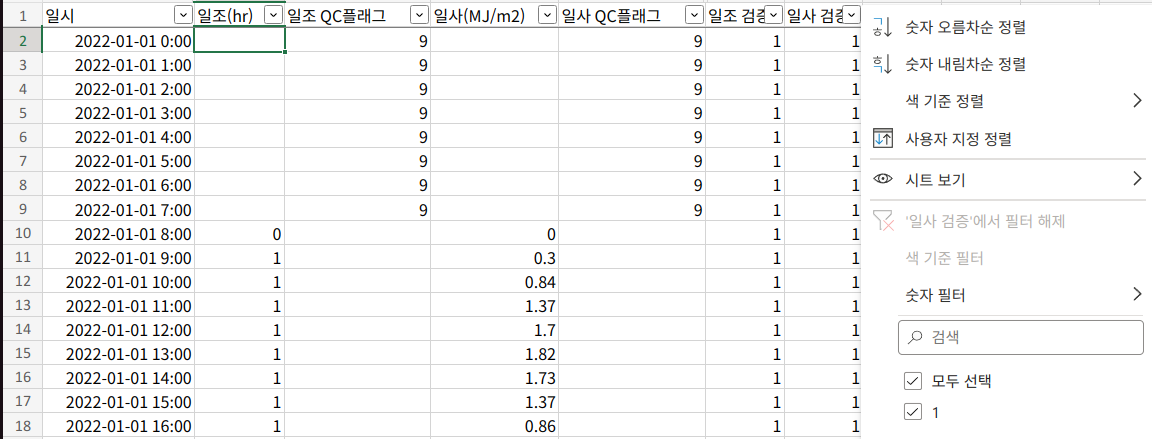

일사, 일조에 관련한 결측치의 경우 플래그 컬럼과 1:1 매칭되는 것을 확인되었고 일조, 일사의 경우 하루의 해가 비치지 않는 시간의 경우 결측치라는 것이 확인 되어 결측치의 경우 0으로 대체, 플래그 컬럼은 삭제 하도록 결정

In [33]:
weather_21 = weather_21.drop(columns=["일조 QC플래그", "일사 QC플래그"])
weather_22 = weather_22.drop(columns=["일조 QC플래그", "일사 QC플래그"])

weather_21["일조(hr)"] = weather_21["일조(hr)"].fillna(0)
weather_22["일조(hr)"] = weather_22["일조(hr)"].fillna(0)

weather_21["일사(MJ/m2)"] = weather_21["일사(MJ/m2)"].fillna(0)
weather_22["일사(MJ/m2)"] = weather_22["일사(MJ/m2)"].fillna(0)

In [34]:
# 추가적인 결측치 확인
missing = weather_21.isnull().sum()
print(missing[missing > 0])

강수량(mm)            90
풍속(m/s)             2
풍향(16방위)            2
적설(cm)             89
3시간신적설(cm)         90
전운량(10분위)           2
운형(운형약어)         3812
최저운고(100m )      4212
현상번호(국내식)        6634
지면온도(°C)            5
5cm 지중온도(°C)        5
10cm 지중온도(°C)       5
20cm 지중온도(°C)       5
30cm 지중온도(°C)       5
dtype: int64


현상번호와 운형, 최저운고의 경우 결측치가 너무 많고 현재 기상현상에 대한 번호이기에 결측치를 마땅한 값으로 대체하기에는 무리가 있기에 해당 컬럼 삭제

해당 컬럼을 삭제후 나머지 결측치의 경우 전체 데이터에서 큰 비중을 차지하지 않기 때문에 결측치가 존재하는 행 삭제

In [37]:
weather_21 = weather_21.drop(columns=["운형(운형약어)", "최저운고(100m )", "현상번호(국내식)"])
weather_22 = weather_22.drop(columns=["운형(운형약어)", "최저운고(100m )", "현상번호(국내식)"])

In [38]:
weather_21 = weather_21.dropna(axis=0)
weather_22 = weather_22.dropna(axis=0)

In [40]:
weather_21.info()
weather_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8660 entries, 90 to 8758
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   일시             8660 non-null   object 
 1   기온(°C)         8660 non-null   float64
 2   강수량(mm)        8660 non-null   float64
 3   풍속(m/s)        8660 non-null   float64
 4   풍향(16방위)       8660 non-null   float64
 5   습도(%)          8660 non-null   int64  
 6   증기압(hPa)       8660 non-null   float64
 7   이슬점온도(°C)      8660 non-null   float64
 8   현지기압(hPa)      8660 non-null   float64
 9   해면기압(hPa)      8660 non-null   float64
 10  일조(hr)         8660 non-null   float64
 11  일사(MJ/m2)      8660 non-null   float64
 12  적설(cm)         8660 non-null   float64
 13  3시간신적설(cm)     8660 non-null   float64
 14  전운량(10분위)      8660 non-null   float64
 15  중하층운량(10분위)    8660 non-null   int64  
 16  시정(10m)        8660 non-null   int64  
 17  지면온도(°C)       8660 non-null   float64
 18  5cm 지중온도(°C)

결측치 없는 총 21개의 컬럼에 대한 약 10,000개에 자료 확보

### 데이터 합치기

각 년도별 미세먼지 데이터와 날씨데이터를 시간 기준으로 병합

In [53]:
air_21.head()

,측정일시,SO2,CO,O3,NO2,PM10,PM25,time
0,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,2021-10-01 01:00:00
1,2021100102,0.003,0.6,0.002,0.035,27.0,16.0,2021-10-01 02:00:00
2,2021100103,0.003,0.6,0.002,0.033,28.0,18.0,2021-10-01 03:00:00
3,2021100104,0.003,0.6,0.002,0.030,26.0,16.0,2021-10-01 04:00:00
4,2021100105,0.003,0.5,0.003,0.026,26.0,16.0,2021-10-01 05:00:00


In [54]:
weather_21.head()

,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
90,2021-01-04 19:00,-0.9,0.0,1.8,70.0,49,2.8,-10.2,1017.8,1028.8,0.0,0.0,0.0,0.0,10.0,9,2000,-0.8,0.0,-0.6,-0.4,0.7
91,2021-01-04 20:00,-0.7,0.0,0.7,200.0,51,3.0,-9.6,1017.8,1028.7,0.0,0.0,0.0,0.0,10.0,9,2000,-0.9,0.0,-0.6,-0.4,0.7
92,2021-01-04 21:00,-0.5,0.0,2.3,90.0,57,3.4,-7.9,1017.4,1028.3,0.0,0.0,0.0,0.0,9.0,9,2000,-0.9,0.0,-0.6,-0.4,0.8
93,2021-01-04 22:00,-0.6,0.0,2.6,320.0,54,3.2,-8.7,1017.8,1028.7,0.0,0.0,0.0,0.0,9.0,9,2000,-1.0,0.0,-0.6,-0.4,0.8
94,2021-01-04 23:00,-1.3,0.0,1.0,50.0,69,3.8,-6.2,1018.0,1029.0,0.0,0.0,0.0,0.0,9.0,9,1361,-1.2,0.0,-0.6,-0.4,0.8


In [55]:
# 측정일시를 문자열로 변환
air_21['측정일시'] = air_21['측정일시'].astype(str)
air_22['측정일시'] = air_22['측정일시'].astype(str)

# 측정일시에서 시간 부분이 '24'인 경우 다음 날의 '00'으로 변경
air_21.loc[air_21['측정일시'].str[-2:] == '24', '측정일시'] = (pd.to_datetime(air_21['측정일시'].str[:-2], format='%Y%m%d') + pd.DateOffset(days=1)).dt.strftime('%Y%m%d') + "00"
air_22.loc[air_22['측정일시'].str[-2:] == '24', '측정일시'] = (pd.to_datetime(air_22['측정일시'].str[:-2], format='%Y%m%d') + pd.DateOffset(days=1)).dt.strftime('%Y%m%d') + "00"

# 문자열을 날짜형으로 변환
air_21['time'] = pd.to_datetime(air_21['측정일시'], format='%Y%m%d%H')
air_22['time'] = pd.to_datetime(air_22['측정일시'], format='%Y%m%d%H')

In [60]:
# 문자열을 날짜형으로 변환
weather_21['time'] = pd.to_datetime(weather_21['일시'], format='%Y-%m-%d %H:%M')
weather_22['time'] = pd.to_datetime(weather_22['일시'], format='%Y-%m-%d %H:%M')

In [85]:
# 데이터프레임 합치기
df_21 = pd.merge(air_21, weather_21, on='time')
df_22 = pd.merge(air_22, weather_22, on='time')

# 'time'열을 인덱스로 설정
df_21.set_index('time', inplace=True)
df_22.set_index('time', inplace=True)

In [86]:
df_21.head()

,측정일시,SO2,CO,O3,NO2,PM10,PM25,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-01 01:00:00,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,2021-10-01 01:00,18.7,0.1,1.0,20.0,85,18.3,16.1,998.8,1008.7,0.0,0.0,1.4,0.0,0.0,0,2000,17.4,22.1,22.0,22.5,22.9
2021-10-01 02:00:00,2021100102,0.003,0.6,0.002,0.035,27.0,16.0,2021-10-01 02:00,18.3,0.1,0.3,0.0,89,18.6,16.4,998.9,1008.8,0.0,0.0,1.4,0.0,0.0,0,2000,17.2,21.8,21.8,22.4,22.8
2021-10-01 03:00:00,2021100103,0.003,0.6,0.002,0.033,28.0,18.0,2021-10-01 03:00,17.7,0.1,2.0,20.0,92,18.5,16.3,998.1,1008.1,0.0,0.0,1.4,0.0,0.0,0,2000,17.0,21.6,21.6,22.2,22.8
2021-10-01 04:00:00,2021100104,0.003,0.6,0.002,0.030,26.0,16.0,2021-10-01 04:00,17.4,0.1,1.0,50.0,91,18.1,15.9,997.9,1007.9,0.0,0.0,1.4,0.0,0.0,0,2000,16.5,21.3,21.4,22.0,22.7
2021-10-01 05:00:00,2021100105,0.003,0.5,0.003,0.026,26.0,16.0,2021-10-01 05:00,17.2,0.1,1.3,270.0,94,18.4,16.2,998.4,1008.4,0.0,0.0,1.4,0.0,4.0,0,1995,16.6,21.1,21.2,21.9,22.6


In [87]:
df_22.head()

,측정일시,SO2,CO,O3,NO2,PM10,PM25,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-02 01:00:00,2022010201,0.004,0.8,0.002,0.052,38.0,24.0,2022-01-02 01:00,-2.9,0.00,2.1,50,57,2.8,-10.2,1015.8,1026.8,0.0,0.0,0.100000,0.10,8,8,2000,-3.4,-0.4,-0.7,-0.3,0.8
2022-01-02 02:00:00,2022010202,0.004,0.8,0.002,0.052,34.0,23.0,2022-01-02 02:00,-2.6,0.00,1.9,50,57,2.9,-9.9,1015.3,1026.3,0.0,0.0,0.300000,0.10,8,8,2000,-2.5,-0.4,-0.7,-0.3,0.8
2022-01-02 03:00:00,2022010203,0.004,0.8,0.002,0.052,35.0,26.0,2022-01-02 03:00,-2.1,0.00,2.5,50,56,2.9,-9.7,1015.1,1026.1,0.0,0.0,0.366667,0.10,9,9,2000,-2.1,-0.4,-0.7,-0.3,0.8
2022-01-02 04:00:00,2022010204,0.004,0.6,0.002,0.046,33.0,24.0,2022-01-02 04:00,-1.9,0.15,2.0,50,55,2.9,-9.7,1014.3,1025.3,0.0,0.0,0.375000,0.25,8,8,2000,-2.1,-0.3,-0.7,-0.3,0.8
2022-01-02 05:00:00,2022010205,0.003,0.5,0.005,0.039,33.0,25.0,2022-01-02 05:00,-1.9,0.15,2.3,50,56,3.0,-9.5,1013.6,1024.5,0.0,0.0,0.360000,0.25,9,9,1814,-2.0,-0.3,-0.7,-0.3,0.8


In [88]:
df_21.drop(columns=["측정일시", "일시"], inplace=True)
df_22.drop(columns=["측정일시", "일시"], inplace=True)

In [89]:
df_21.head()

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
time,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-01 01:00:00,0.003,0.6,0.002,0.039,31.0,18.0,18.7,0.1,1.0,20.0,85,18.3,16.1,998.8,1008.7,0.0,0.0,1.4,0.0,0.0,0,2000,17.4,22.1,22.0,22.5,22.9
2021-10-01 02:00:00,0.003,0.6,0.002,0.035,27.0,16.0,18.3,0.1,0.3,0.0,89,18.6,16.4,998.9,1008.8,0.0,0.0,1.4,0.0,0.0,0,2000,17.2,21.8,21.8,22.4,22.8
2021-10-01 03:00:00,0.003,0.6,0.002,0.033,28.0,18.0,17.7,0.1,2.0,20.0,92,18.5,16.3,998.1,1008.1,0.0,0.0,1.4,0.0,0.0,0,2000,17.0,21.6,21.6,22.2,22.8
2021-10-01 04:00:00,0.003,0.6,0.002,0.030,26.0,16.0,17.4,0.1,1.0,50.0,91,18.1,15.9,997.9,1007.9,0.0,0.0,1.4,0.0,0.0,0,2000,16.5,21.3,21.4,22.0,22.7
2021-10-01 05:00:00,0.003,0.5,0.003,0.026,26.0,16.0,17.2,0.1,1.3,270.0,94,18.4,16.2,998.4,1008.4,0.0,0.0,1.4,0.0,4.0,0,1995,16.6,21.1,21.2,21.9,22.6


In [91]:
# y값 설정 전 데이터 변경
df_21['PM10_t+1'] = df_21['PM10'].shift(-1)
df_21['PM25_t+1'] = df_21['PM25'].shift(-1)

df_22['PM10_t+1'] = df_22['PM10'].shift(-1)
df_22['PM25_t+1'] = df_22['PM25'].shift(-1)

In [93]:
df_21.dropna(inplace=True)
df_22.dropna(inplace=True)

In [94]:
# 시간정보 포함
df_21['year'] = df_21.index.year
df_21['month'] = df_21.index.month
df_21['day'] = df_21.index.day
df_21['hour'] = df_21.index.hour

df_22['year'] = df_22.index.year
df_22['month'] = df_22.index.month
df_22['day'] = df_22.index.day
df_22['hour'] = df_22.index.hour

In [95]:
# 완성된 데이터 내보내기
df_21.to_csv('df_21.csv', index=True, encoding='utf-8-sig')
df_22.to_csv('df_22.csv', index=True, encoding='utf-8-sig')